# Fase 1: Análise Exploratória de Dados (M1)

Este notebook replica a análise inicial dos dados dos candidatos, focando em:
1. Carregamento e Limpeza Inicial
2. Distribuição Geográfica
3. Distribuição Etária
4. Análise de Rendimentos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuração de Estilo
sns.set_theme(style="whitegrid")

# Caminhos (Assumindo que o notebook está na pasta 'notebooks')
data_path = '../data/raw/amostras_desafio.xlsx'
processed_path = '../data/processed/'
figures_path = '../reports/figures/'

# Garantir que as pastas existem
os.makedirs(processed_path, exist_ok=True)
os.makedirs(figures_path, exist_ok=True)

## 1. Carregamento e Limpeza dos Dados

In [2]:
# Carregar os dados
try:
    df = pd.read_excel(data_path)
    print("Dados carregados com sucesso!")
    display(df.head())
    print(df.info())
except Exception as e:
    print(f"Erro ao carregar dados: {e}")

Dados carregados com sucesso!


,Contexto,Estado,Data Estado,Escalão Etário,Nº Elem. Agregado,Nº Adultos,Concelho,Rendimento Global (IRS e Rend. Isentos)
0,Registo de Adesão,Registado,2023-12-20,Menos 35 anos,1,1,Lisboa,20644.16
1,Registo de Adesão,Registado,2024-11-06,35 a 65 anos,1,1,Amadora,12127.51
2,Registo de Adesão,Registado,2023-02-27,Menos 35 anos,4,1,Lisboa,3939.92
3,Registo de Adesão,Registado,2024-11-07,Menos 35 anos,1,1,Lisboa,21467.20
4,Registo de Adesão,Registado,2023-02-14,Menos 35 anos,1,1,Porto,20391.15


<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Contexto                                 100 non-null    str           
 1   Estado                                   100 non-null    str           
 2   Data Estado                              100 non-null    datetime64[us]
 3   Escalão Etário                           100 non-null    str           
 4   Nº Elem. Agregado                        100 non-null    int64         
 5   Nº Adultos                               100 non-null    int64         
 6   Concelho                                 100 non-null    str           
 7   Rendimento Global (IRS e Rend. Isentos)  100 non-null    float64       
dtypes: datetime64[us](1), float64(1), int64(2), str(4)
memory usage: 6.4 KB
None


In [3]:
# Limpeza de colunas
df.columns = [col.strip() for col in df.columns]

rename_map = {
    'Contexto': 'contexto',
    'Estado': 'estado',
    'Data Estado': 'data_estado',
    'Escalão Etário': 'escalao_etario',
    'Nº Elem. Agregado': 'n_elem_agregado',
    'Nº Adultos': 'n_adultos',
    'Concelho': 'concelho',
    'Rendimento Global (IRS e Rend. Isentos)': 'rendimento_anual_bruto'
}

df.rename(columns=rename_map, inplace=True)
display(df.head())

,contexto,estado,data_estado,escalao_etario,n_elem_agregado,n_adultos,concelho,rendimento_anual_bruto
0,Registo de Adesão,Registado,2023-12-20,Menos 35 anos,1,1,Lisboa,20644.16
1,Registo de Adesão,Registado,2024-11-06,35 a 65 anos,1,1,Amadora,12127.51
2,Registo de Adesão,Registado,2023-02-27,Menos 35 anos,4,1,Lisboa,3939.92
3,Registo de Adesão,Registado,2024-11-07,Menos 35 anos,1,1,Lisboa,21467.20
4,Registo de Adesão,Registado,2023-02-14,Menos 35 anos,1,1,Porto,20391.15


## 2. Análise Exploratória

### 2.1 Distribuição Geográfica

C:\Users\localadmin\AppData\Local\Temp\ipykernel_14384\2950367199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='concelho', data=df, order=df['concelho'].value_counts().index, palette='viridis')


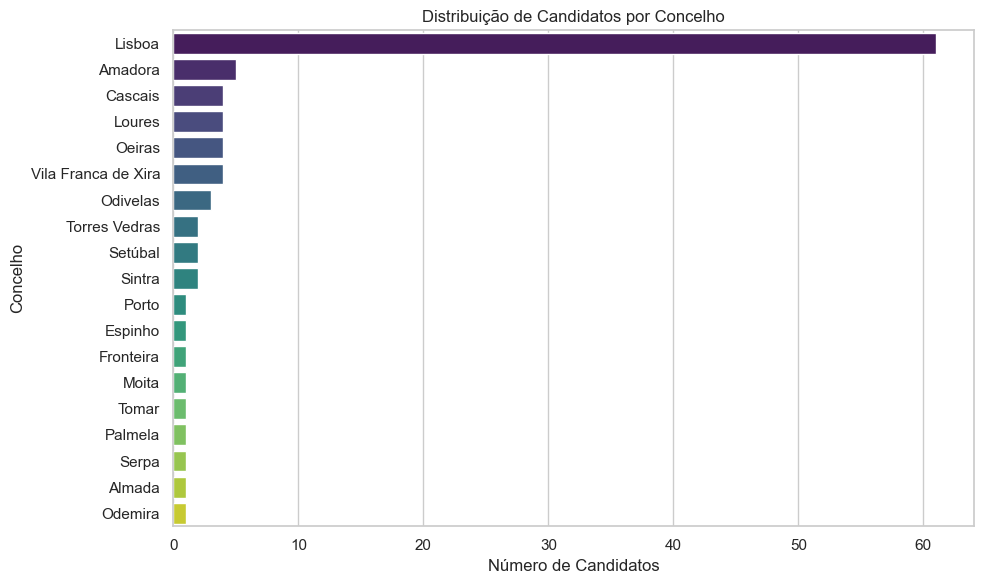

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(y='concelho', data=df, order=df['concelho'].value_counts().index, palette='viridis')
plt.title('Distribuição de Candidatos por Concelho')
plt.xlabel('Número de Candidatos')
plt.ylabel('Concelho')
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'distribuicao_concelho.png'))
plt.show()

### 2.2 Distribuição Etária

C:\Users\localadmin\AppData\Local\Temp\ipykernel_14384\3885390901.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='escalao_etario', data=df, order=['Menos 35 anos', '35 a 65 anos', 'Mais 65 anos'], palette='pastel')


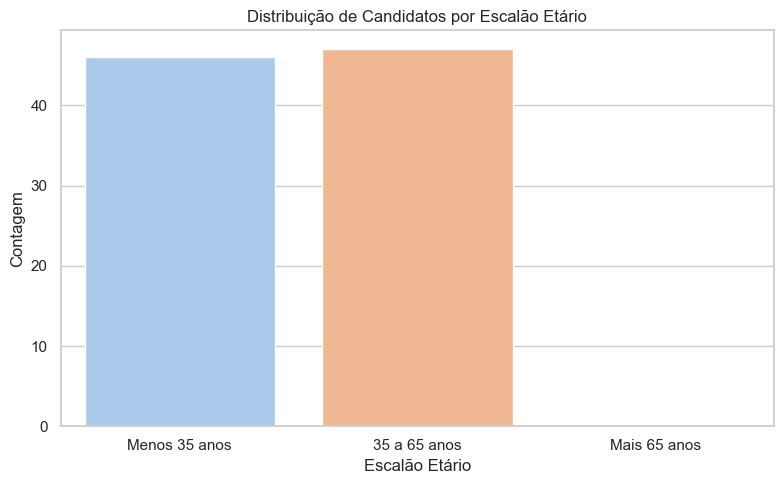

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='escalao_etario', data=df, order=['Menos 35 anos', '35 a 65 anos', 'Mais 65 anos'], palette='pastel')
plt.title('Distribuição de Candidatos por Escalão Etário')
plt.xlabel('Escalão Etário')
plt.ylabel('Contagem')
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'distribuicao_etaria.png'))
plt.show()

### 2.3 Análise de Rendimentos

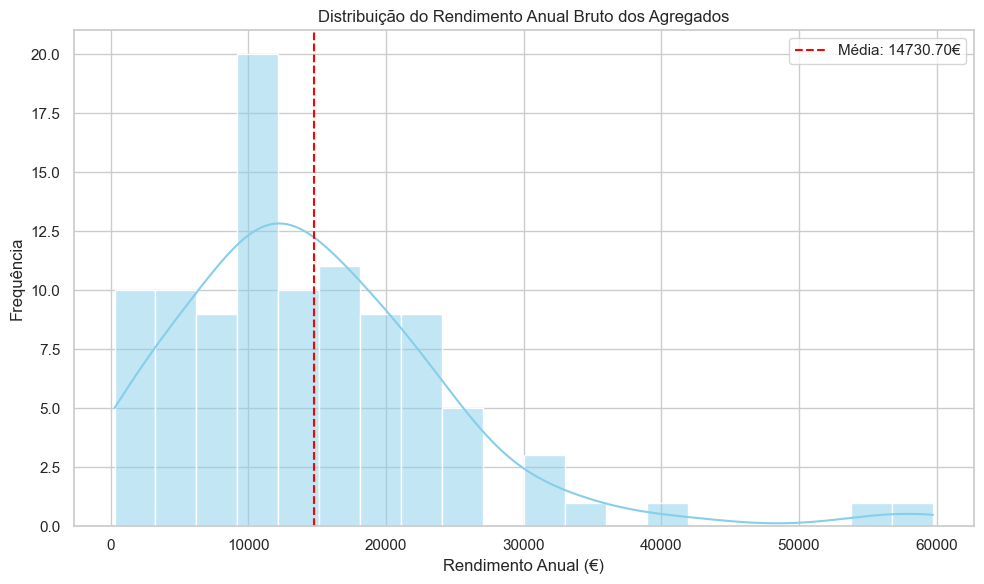

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rendimento_anual_bruto'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição do Rendimento Anual Bruto dos Agregados')
plt.xlabel('Rendimento Anual (€)')
plt.ylabel('Frequência')
plt.axvline(df['rendimento_anual_bruto'].mean(), color='red', linestyle='--', label=f'Média: {df["rendimento_anual_bruto"].mean():.2f}€')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'distribuicao_rendimento.png'))
plt.show()

## 3. Exportação dos Dados Limpos

In [7]:
df.to_csv(os.path.join(processed_path, 'amostra_limpa_M1.csv'), index=False)
print("Análise M1 concluída! Dados exportados e gráficos guardados.")

Análise M1 concluída! Dados exportados e gráficos guardados.
